---
# 01. Normal equation
---

In [96]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [97]:
# 모든 샘플에 x0 = 1을 추가합니다.
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [98]:
theta_best

array([[3.68703038],
       [3.23207281]])

In [99]:
X_new = np.array([[0], [2]])
# 모든 샘플에 x0 = 1을 추가합니다.
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.68703038],
       [10.151176  ]])

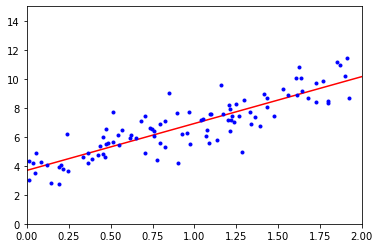

In [100]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

---
# 02. Linear Regression
---

In [101]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.68703038]), array([[3.23207281]]))

In [102]:
lin_reg.predict(X_new)

array([[ 3.68703038],
       [10.151176  ]])

In [103]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.68703038],
       [3.23207281]])

In [104]:
np.linalg.pinv(X_b).dot(y)

array([[3.68703038],
       [3.23207281]])

In [105]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

# 무작위 초기화
theta = np.random.randn(2, 1)  

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [106]:
theta

array([[3.68703038],
       [3.23207281]])

---
# 03. Stochastic Gradient Descent [SGD]
---

In [107]:
n_epochs = 50
t0, t1   = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

# 무작위 초기화
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta   = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [108]:
theta

array([[3.6431224 ],
       [3.20884187]])

In [109]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [110]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7205888]), array([3.28783166]))

---
# 04. Polynomial Regression
---

In [111]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [112]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.97697713])

In [113]:
X_poly[0]

array([-2.97697713,  8.86239281])

In [114]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94255864]), array([[0.97171506, 0.45353737]]))

---
# 05. Learning Curve
---

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
    	# 처음부터 m까지 데이터로 학습
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        # 검증 세트에 대한 예측
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val set')
    plt.legend()

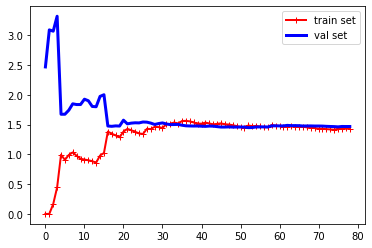

In [116]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

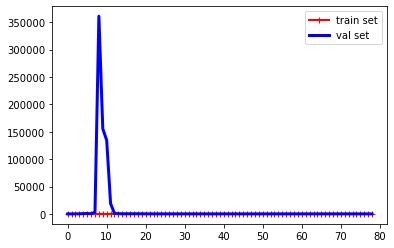

In [117]:
from sklearn.pipeline import Pipeline 

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

---
# 06. Ridge Regression
---

In [118]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.32227963]])

In [119]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.31367505])

---
# 07. Lasso Regression
---

In [120]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.26501892])

---
# 08. ElasticNet
---

In [121]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.2715309])

---
# 09. Early Termination
---

In [122]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    # 훈련을 이어서 진행합니다
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

C:\Users\82105\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\82105\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\82105\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
C:\Users\82105\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the

---
# 10. Logistic Regression
---

In [123]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [124]:
# 꽃잎의 너비
X = iris["data"][:, 3:]

# 1 Iris-Virginica면 1, 그렇지 않으면 0
y = (iris["target"] == 2).astype(int)

In [125]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

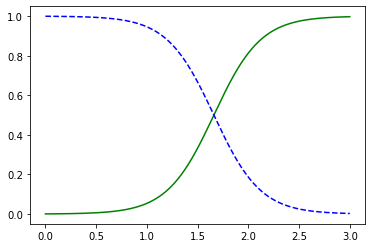

In [127]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
# 다음은 이미지를 미려하게 출력하기 위한 맷플롯립 코드가 이어집니다

In [129]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

---
# 11. Softmax Regression
---

In [130]:
# 꽃잎 길이, 꽃잎 너비
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [131]:
softmax_reg.predict([[5, 2]])

array([2])

In [132]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])